In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print


# loading Data

In [206]:
df=pd.read_csv(r'D:\course\Courses\data science\spam.csv',encoding="latin1")

In [207]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


---

##  Data Cleaning

---

In [208]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 3'],axis=1,inplace=True)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 4  6 non-null      object
dtypes: object(3)
memory usage: 130.7+ KB


In [210]:
df

,v1,v2,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN


In [211]:
df.drop('Unnamed: 4',axis=1,inplace=True)

In [212]:
from sklearn.tree import DecisionTreeRegressor

In [213]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [214]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [215]:
df.duplicated().sum()

np.int64(403)

In [216]:
df.drop_duplicates(inplace=True)

---

## Data Exploration

---

C:\Users\DELL\AppData\Local\Temp\ipykernel_23976\4293640298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(df['v1'],palette=cols)


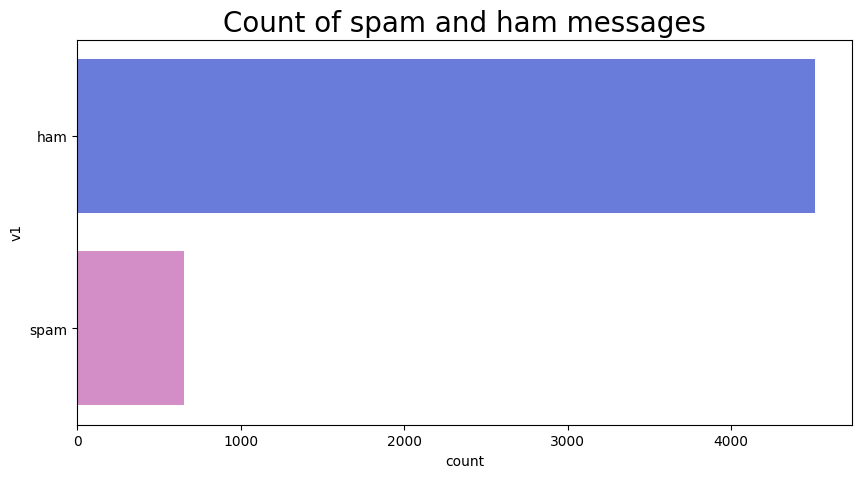

In [217]:
cols= ["#5770EC", "#DE83CE"] 
plt.figure(figsize=(10,5))
fg=sns.countplot(df['v1'],palette=cols)
fg.set_title("Count of spam and ham messages",color='black',fontsize=20,)
plt.show()

In [218]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [219]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x169d02fc950>,
 [Text(0.5496460009794303, -1.066718929056441, 'ham'),
  Text(-0.5496463485605466, 1.0667187499589843, 'spam')],
 [Text(0.3206268339046676, -0.6222527086162571, '87.4%'),
  Text(-0.3206270366603189, 0.6222526041427409, '12.6%')])

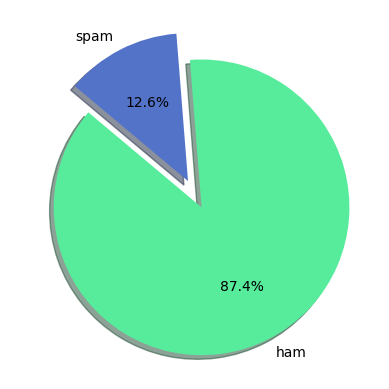

In [220]:
cols=["#57EC9C", "#5373C9"]
label=['ham','spam']
plt.pie(x=df['Target'].value_counts(),labels=label,autopct='%.1f%%',colors=cols,explode=(0.1,0.1),shadow=True,startangle=140)


---

## Feature Engineering

---

In [221]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [222]:
#num_word==> number of word in text 
df['Num_word']=df['Text'].apply(lambda x :len(x.split()))

In [223]:
df["len_word"]=df["Text"].apply(lambda x: len(x))

In [224]:
df['num_sentences'] = df['Text'].apply(lambda x: len([x for x in x.split('.') if x]))

In [225]:
df

,Target,Text,Num_word,len_word,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,3
1,ham,Ok lar... Joking wif u oni...,6,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2
3,ham,U dun say so early hor... U c already then say...,11,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,4
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,1
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,3
5570,ham,The guy did some bitching but I acted like i'd...,26,125,1


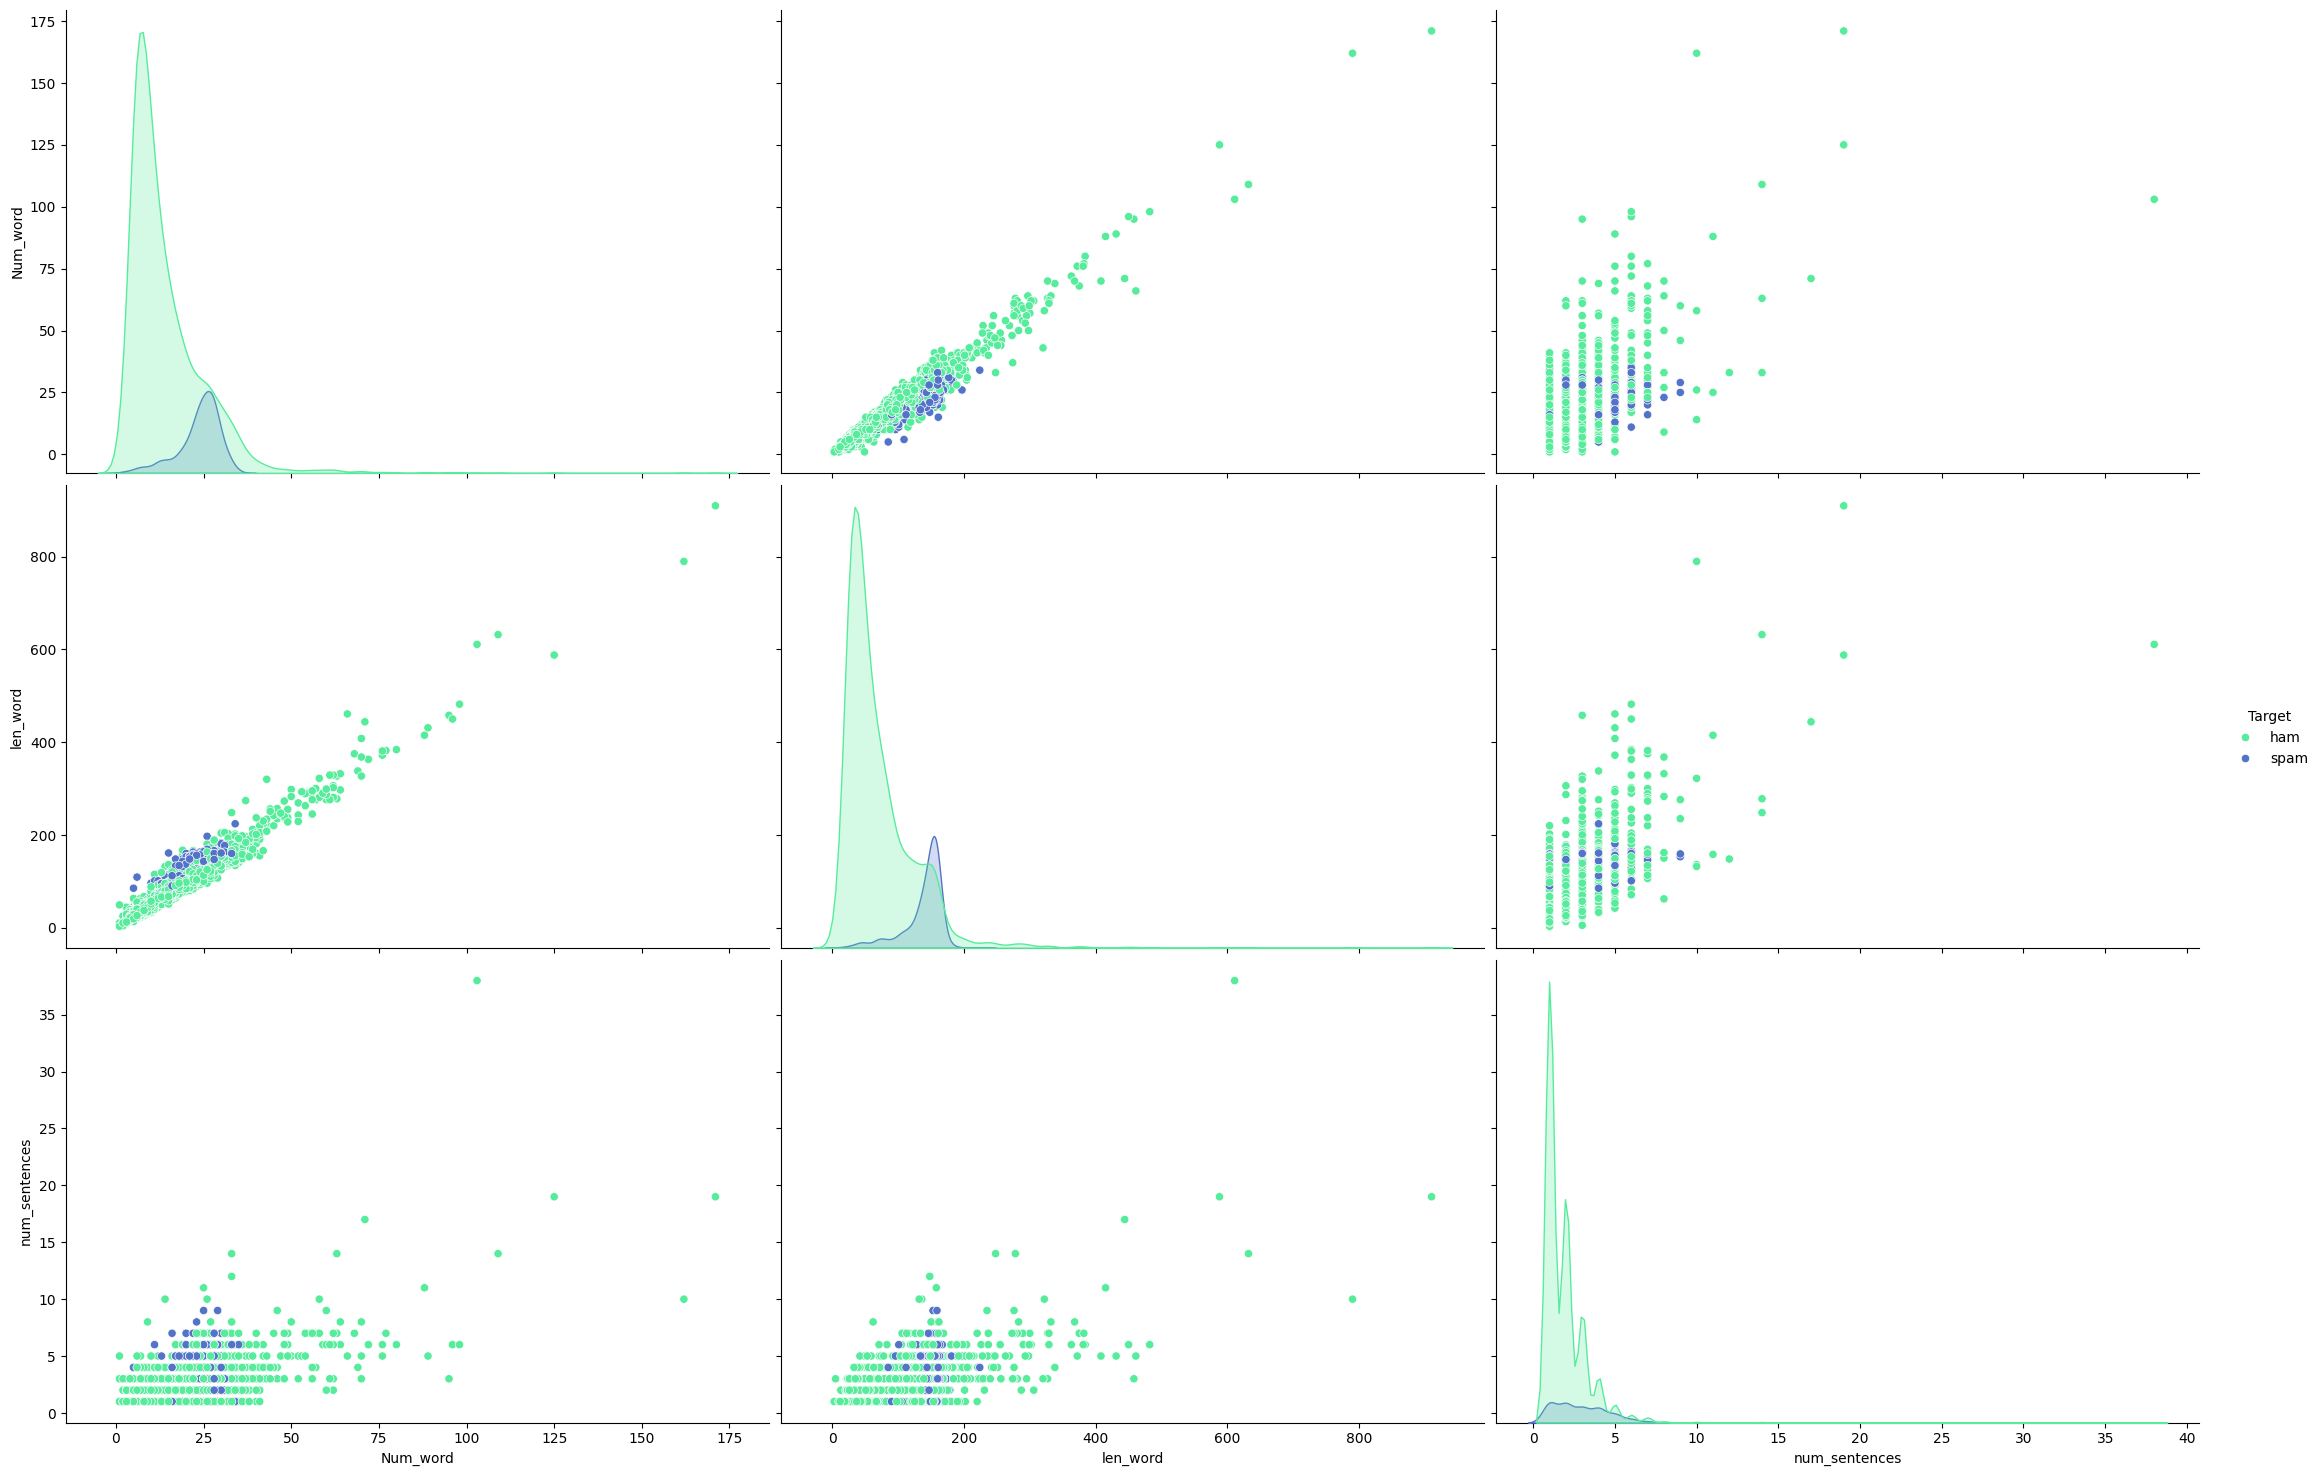

In [226]:
sns.pairplot(df,hue='Target',palette=cols,vars=['Num_word','len_word','num_sentences'],height=5,aspect=1.5)

In [227]:
num_num=df.select_dtypes(include=[np.number])

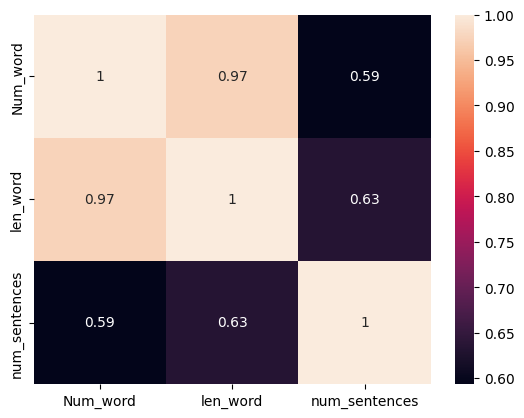

In [228]:
sns.heatmap(num_num.corr(),annot=True)
plt.show()

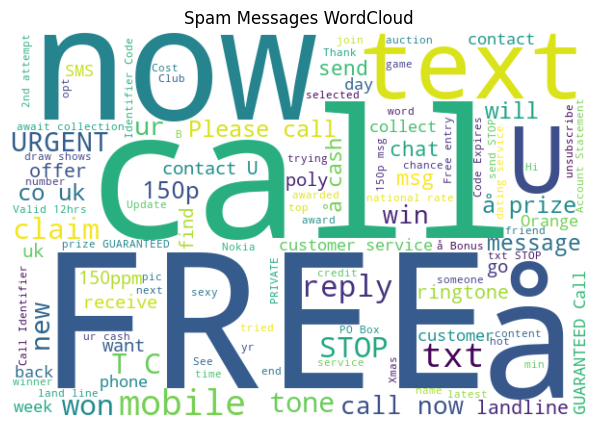

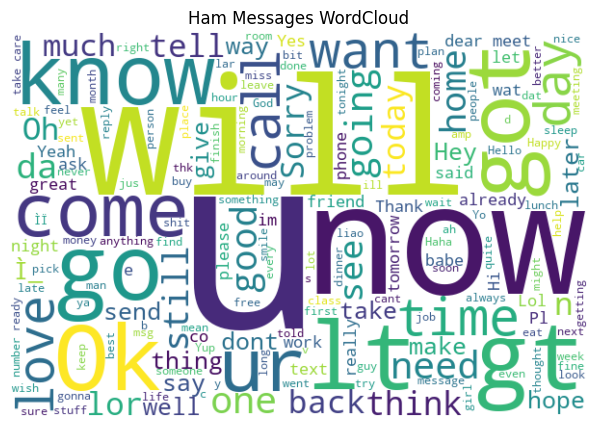

In [229]:

from wordcloud import WordCloud

spam_text = " ".join(df[df['Target'] == 'spam']['Text'])


ham_text = " ".join(df[df['Target'] == 'ham']['Text'])


wc = WordCloud(width=600, height=400, background_color='white', min_font_size=10)


plt.figure(figsize=(10, 5))
plt.title("Spam Messages WordCloud")
plt.imshow(wc.generate(spam_text), interpolation='bilinear')
plt.axis("off")
plt.show()


plt.figure(figsize=(10, 5))
plt.title("Ham Messages WordCloud")
plt.imshow(wc.generate(ham_text), interpolation='bilinear')
plt.axis("off")
plt.show()


In [230]:
# top spam word call and free now 

In [231]:
from collections import Counter
import string

In [232]:
spam_text = " ".join(df[df['Target'] == 'spam']['Text'])

spam_text_clean = spam_text.translate(str.maketrans('', '', string.punctuation)).lower()

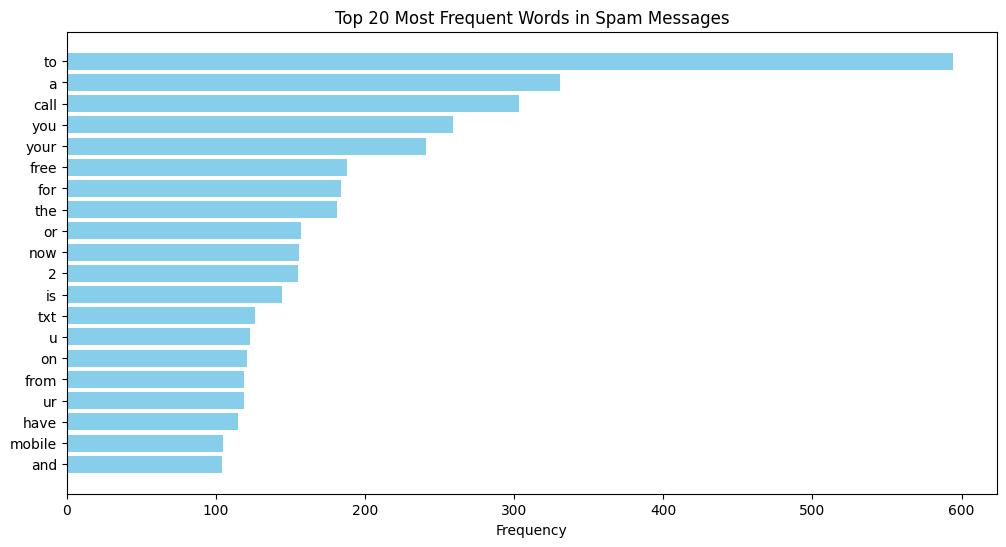

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string


spam_text = " ".join(df[df['Target'] == 'spam']['Text'])
spam_text_clean = spam_text.translate(str.maketrans('', '', string.punctuation)).lower()
word_counts = Counter(spam_text_clean.split())
most_common_words = word_counts.most_common(20)
common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
plt.barh(common_df['word'], common_df['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.gca().invert_yaxis() 
plt.show()


---

## Encoding Data 

---

In [234]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Target"])
# df["Text"]=le.fit_transform(df["Text"])

In [235]:
# df['v1']=np.where(df['v1']=='ham',0,1)

In [236]:
x=df.drop('Target',axis=1)
y=df['Target']


In [237]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64

In [238]:
print(x)

Text  Num_word  len_word  \
0     Go until jurong point, crazy.. Available only ...        20       111   
1                         Ok lar... Joking wif u oni...         6        29   
2     Free entry in 2 a wkly comp to win FA Cup fina...        28       155   
3     U dun say so early hor... U c already then say...        11        49   
4     Nah I don't think he goes to usf, he lives aro...        13        61   
...                                                 ...       ...       ...   
5567  This is the 2nd time we have tried 2 contact u...        30       161   
5568              Will Ì_ b going to esplanade fr home?         8        37   
5569  Pity, * was in mood for that. So...any other s...        10        57   
5570  The guy did some bitching but I acted like i'd...        26       125   
5571                         Rofl. Its true to its name         6        26   

      num_sentences  
0                 3  
1                 2  
2                 2  
3                 2  
4                 1  
...             ...  
5567              4  
5568              1  
5569              3  
5570              1  
5571              2  

[5169 rows x 4 columns]

---

## Build model & evaluation 
---

In [239]:
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [240]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [241]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [242]:
y_test=np.array(y_test)

In [243]:
X_train

,Text,Num_word,len_word,num_sentences
2228,Those were my exact intentions,5,30,1
5529,What about this one then.,5,25,1
2149,Waaaat?? Lololo ok next time then!,6,34,1
5058,Free video camera phones with Half Price line ...,24,145,2
5051,"Tick, tick, tick .... Where are you ? I could ...",23,111,2
...,...,...,...,...
4740,Many more happy returns of the day. I wish you...,12,62,2
474,Nice line said by a broken heart- Plz don't cu...,26,125,3
3266,Ok then i come n pick u at engin?,9,33,1
4016,Eek that's a lot of time especially since Amer...,20,103,2


In [244]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['Text']).toarray()
# X_test= vectorizer.transform(X_test).toarray()

In [245]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [246]:
print("X_train_tfidf shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train_tfidf shape:
(4135, 8672)

y_train shape:
(4135,)

In [247]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4135, 8672))

# Naive bayes 

In [248]:
model1=GaussianNB()
model1.fit(X_train ,y_train)
y_pred1=model1.predict(X_test)


In [249]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
acc=accuracy_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1,average='weighted')
print("Accuracy:", acc)
print("F1 Score:", f1)



Accuracy: 0.9061895551257253

F1 Score: 0.9129980107377824

<Axes: >

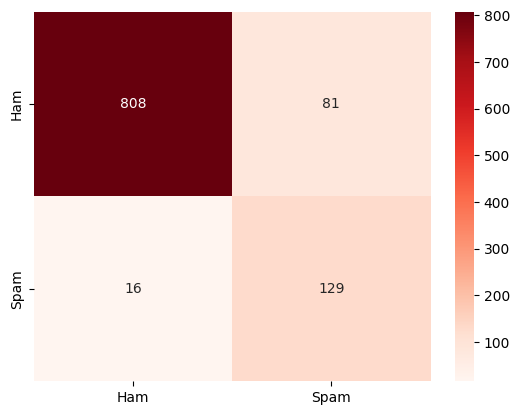

In [250]:
conf=confusion_matrix(y_test, y_pred1)
conf
sns.heatmap(conf, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

In [251]:
cals_report=classification_report(y_test,y_pred1)
print(cals_report)

precision    recall  f1-score   support

           0       0.98      0.91      0.94       889
           1       0.61      0.89      0.73       145

    accuracy                           0.91      1034
   macro avg       0.80      0.90      0.84      1034
weighted avg       0.93      0.91      0.91      1034

# logistic Regression()

In [252]:
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)


In [253]:
model2.coef_

array([[ 0.4070977 ,  0.36844012, -0.01564524, ...,  0.12256116,
        -0.03764224, -0.00391477]], shape=(1, 8672))

In [254]:
model2


LogisticRegression()

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
acc1=accuracy_score(y_test,y_pred2)
f11=f1_score(y_test,y_pred2,average='weighted')
print("Accuracy:", acc1)
print("F1 Score:", f11)

Accuracy: 0.9787234042553191

F1 Score: 0.9782668921523281

<Axes: >

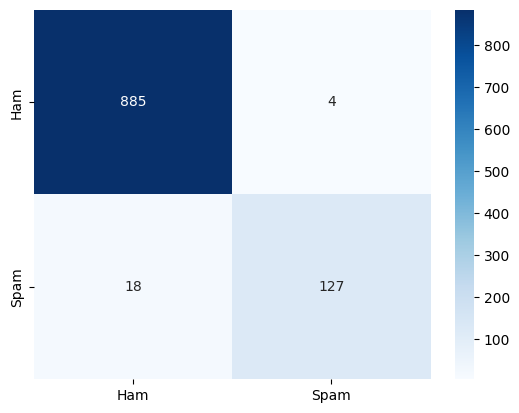

In [256]:
conf_logist=confusion_matrix(y_test,y_pred2)
sns.heatmap(conf_logist, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

In [257]:
cals_report=classification_report(y_test,y_pred2)
print(cals_report)

precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

In [258]:
model2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [259]:
##logistic regression with pramater 
model3=LogisticRegression(C=100,penalty='l2',solver='saga')
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [260]:
acccuracy=accuracy_score(y_test,y_pred3)
print(acccuracy)

0.9796905222437138

 ## Multinomial Naive Bayes
Multinomial Naive Bayesis used when features represent the frequency of terms (such as word counts) in a document. It is commonly applied in text classification, where term frequencies are important.

In [261]:
from sklearn.naive_bayes import MultinomialNB , BernoulliNB

In [262]:
model4=MultinomialNB()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)


In [263]:
accuracy3=accuracy_score(y_test,y_pred4)
f1_score=f1_score(y_test,y_pred4,average="weighted")
print("Accuracy of MultinomialNB:", accuracy3)
print("F1 Score of MultinomialNB:", f1_score)

Accuracy of MultinomialNB: 0.9825918762088974

F1 Score of MultinomialNB: 0.9825918762088974

## Bernolli Naive Bayes 

In [264]:
model5=BernoulliNB()
model5.fit(X_train, y_train)
y_pred4 = model5.predict(X_test)

In [284]:
accuracy4=accuracy_score(y_test,y_pred4)
#f1_score3=f1_score(y_test,y_pred4,average="weighted")
print("Accuracy of BernoulliNB:", accuracy4)


Accuracy of BernoulliNB: 0.9787234042553191

## Roc curve

In [267]:
from sklearn.metrics import roc_curve , auc

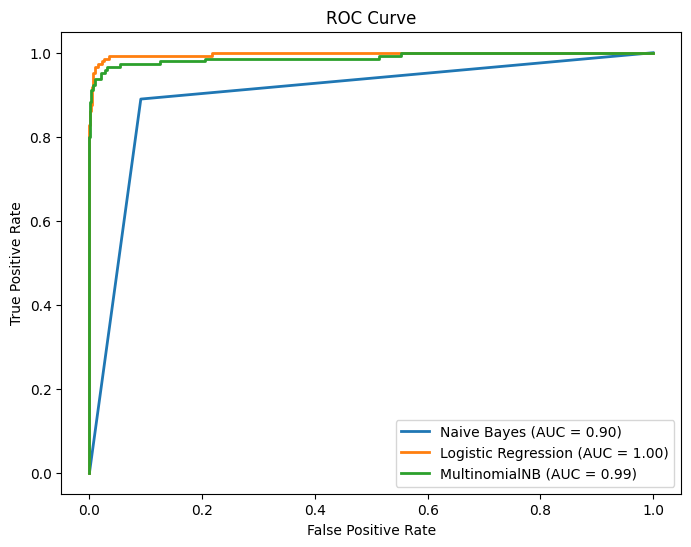

In [268]:
# ROC curve 
models = {
    "Naive Bayes": model1,
    "Logistic Regression": model2,
    "MultinomialNB": model4
}

plt.figure(figsize=(8, 6))
for model in models.items():
    y_prob = model[1].predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model[0]} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# y_prob1 = model1.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)




# SVM

In [269]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)


Accurancy: 0.9787234042553191

report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       909
           1       0.86      0.99      0.92       125

    accuracy                           0.98      1034
   macro avg       0.93      0.98      0.95      1034
weighted avg       0.98      0.98      0.98      1034

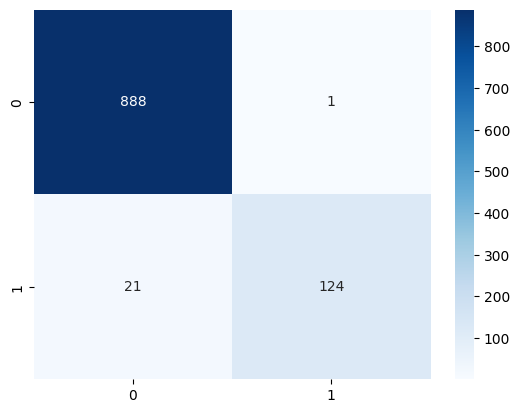

In [270]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print("Accurancy:",accuracy_score(y_test,y_pred4))
Confusion=confusion_matrix(y_test,y_pred4)
sns.heatmap(Confusion,annot=True,fmt='d',cmap='Blues')
print('report:',classification_report(y_pred4,y_test))

### SVM Kernak (linear)

In [271]:
from sklearn.svm import SVC
model1=SVC(C=0.1,kernel='linear',max_iter=5000)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print("Accurancy:",accuracy_score(y_test,y_pred))

Accurancy: 0.9835589941972921

### SVM Kernak (poly)

In [272]:
from sklearn.svm import SVC
model6=SVC(C=0.1,max_iter=5000,kernel='poly',degree=3,probability=True)
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print("Accurancy:",accuracy_score(y_test,y_pred6))

Accurancy: 0.9032882011605415

# KNN

In [273]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print("Accurancy:",accuracy_score(y_test,y_pred))

Accurancy: 0.9235976789168279

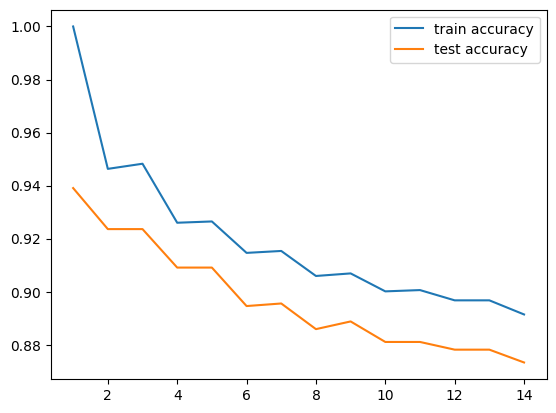

In [274]:
train_acc = []
test_acc = []
for i in range(1, 15):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    train_acc.append(KNN.score(X_train, y_train))
    test_acc.append(KNN.score(X_test, y_test))
num_neighbors = [i for i in range(1, 15)]
plt.plot(num_neighbors,train_acc,label='train accuracy')
plt.plot(num_neighbors,test_acc,label='test accuracy')
plt.legend()
plt.show()

In [275]:
from sklearn.model_selection import cross_val_score

In [276]:
cv_scores=[]

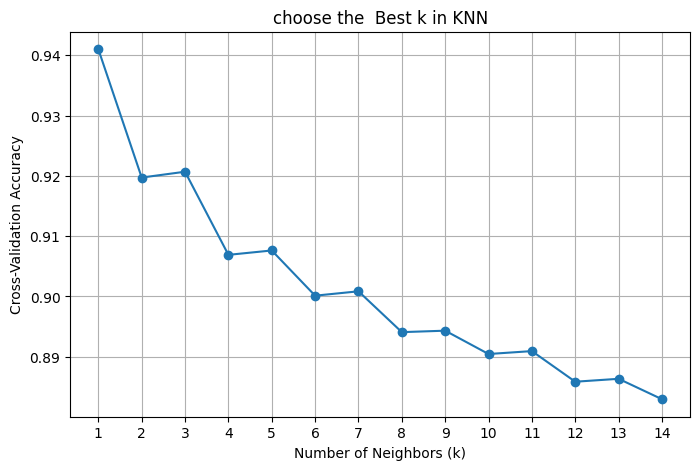

In [277]:
k_range= list(range(1, 15))  # Range of k values to test
for k  in range(1, 15) :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

# 📉 رسم النتائج
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title('choose the  Best k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Decision tree

In [278]:
from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier(max_depth=3,max_features=2)
model7.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=2)

In [279]:
y_pred7=model7.predict(X_test)

In [280]:
print("Accurancy:",accuracy_score(y_test,y_pred7))

Accurancy: 0.8597678916827853

# Random forest 

In [281]:
from sklearn.ensemble import RandomForestClassifier
model8=RandomForestClassifier(n_estimators=5, max_depth=3, max_features=4)

In [282]:
model8.fit(X_train,y_train)
y_pred8=model8.predict(X_test)

In [283]:
print("Accurancy:",accuracy_score(y_test,y_pred8))

Accurancy: 0.8597678916827853

## Conclusion

### Logistic regression 
*  The accuracy of the Model is 0.9787234042553191

### Random forest  
*  The accuracy of the Model is 0.8597678916827853

### Decision tree
*  The accuracy of the Model is 0.8597678916827853

### KNN
*  The accuracy of the Model is 0.9235976789168279

### SVC
*  The accuracy of the Model is 0.9787234042553191
### SVC kernal polynomial 
*  The accuracy of the Model is 0.9032882011605415
### SVC kernal Linear 
*  The accuracy of the Model is 0.9835589941972921



### Naive bayes
*  The accuracy of the Model is 0.9061895551257253

### Multinomial naive  bayes 
*  The accuracy of the Model is 0.9825918762088974

### Bernoulli naive bayes  
*  The accuracy of the Model is 0.97678916827853

## The best model  for this problem is 
logistic regression and Naive mulitnomial and bernolli  